In [367]:
# load csv file with raw data

import pandas as pd
#raw = pd.read_csv("/Users/ethan/Desktop/test_deleteme3.csv")
#raw = pd.read_csv("/Users/ethan/Documents/GitHub/OpenSesame/Sternberg/data/Sternber_data_long.csv")
#raw = pd.read_csv("/Users/ethan/Documents/GitHub/OpenSesame/Sternberg/data/jatos_results_2020.csv")

# Semiotics
raw1 = pd.read_csv("/Users/ethan/Documents/GitHub/ExPsyLing/datasets/Sternberg/2021/Sternberg_2021_1.csv")

# Linguistics
raw2 = pd.read_csv("/Users/ethan/Documents/GitHub/ExPsyLing/datasets/Sternberg/2021/Sternberg_2021_2.csv")

raw = pd.concat([raw1, raw2])

#raw = pd.read_csv("/Users/ethan/Documents/GitHub/ExPsyLing/datasets/Sternberg/2021/Sternberg_2021_SoMe.csv")
#raw.head()

,acc,accuracy,average_response_time,avg_rt,background,bidi,block,browser_codename,browser_name,browser_version,...,time_memory_set,time_new_logger,time_practiceLoop,time_probe,title,total_correct,total_response_time,total_responses,uniform_coordinates,width
0,100,100,1097,1097,black,no,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,...,25738,30063,81,28954,Sternberg_updated,1,1097,1,yes,1024
1,100,100,893,893,black,no,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,...,32107,36015,81,35324,Sternberg_updated,2,1786,2,yes,1024
2,100,100,908,908,black,no,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,...,38058,42218,81,41276,Sternberg_updated,3,2723,3,yes,1024
3,100,100,914,914,black,no,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,...,44262,48418,81,47477,Sternberg_updated,4,3655,4,yes,1024
4,100,100,934,934,black,no,practice,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,...,50458,54715,81,53689,Sternberg_updated,5,4672,5,yes,1024


In [368]:
# create a new dataframe with only the data we need from raw

df = pd.DataFrame({'sessionid': raw['sessionid'],
                   'block': raw['block'],
                   'correct': raw['correct'],
                   'setSize': raw['setSize'],
                   'present': raw['present'],
                   'rt': raw['response_time']})

# find all the unique session id's from the raw data
ids = list(set(df['sessionid']))

# make a new column with a simple ID number for each participant
id = []
for s, val in enumerate(df['sessionid']):
    for i, num in enumerate(ids):
        if val == num:
            id.append(i+1)            
df['id'] = id

# print the number of participants we have data for
print(len(list(set(df['id']))))

32


In [369]:
# there are 138 trials in a full run.

ids = list(set(df['id']))

completion_status = []
for n in ids:
    if list(df['id']).count(n) == 138:
        completion_status.append((n,1))
    if list(df['id']).count(n) != 138:
        completion_status.append((n,0))

complete = []        
for s, val in enumerate(df['id']):
    for n in completion_status:
        if val == n[0]:
            complete.append(n[1])

df['complete'] = complete
set(df['block'])

{'experiment', 'practice'}

In [370]:
df.shape

(5008, 8)

In [371]:
# remove incomplete runs
d = df.loc[df['complete'] == 1]

In [372]:
d.shape

(2208, 8)

In [373]:
# remove practice trials
d = d.loc[d['block'] != "practice"]

# keep only correct answers
d = d.loc[d['correct'] == 1]

# keep only the data we need
keep = ['id', 'setSize', 'present','rt']
d = d[keep]

d.to_csv("/Users/ethan/Documents/GitHub/ExPsyLing/datasets/Sternberg/2021/Sternberg_2021_combined.csv")

In [348]:
#group_by(setSize, present, id) 

data = d.groupby(['setSize', 'present', 'id']).agg('mean')
data

rt
setSize present id            
1       n       2   426.000000
                3   889.000000
                4   543.333333
                9   576.333333
                10  738.333333
...                        ...
6       y       25  837.875000
                26  599.214286
                30  647.588235
                31  884.357143
                32  532.200000

[192 rows x 1 columns]

In [349]:
data = data.reset_index()
data

,setSize,present,id,rt
0,1,n,2,426.000000
1,1,n,3,889.000000
2,1,n,4,543.333333
3,1,n,9,576.333333
4,1,n,10,738.333333
...,...,...,...,...
187,6,y,25,837.875000
188,6,y,26,599.214286
189,6,y,30,647.588235
190,6,y,31,884.357143


In [324]:

present = data[data['present'] == 'y']
notpresent = data[data['present'] == 'n']

In [350]:
import seaborn as sns

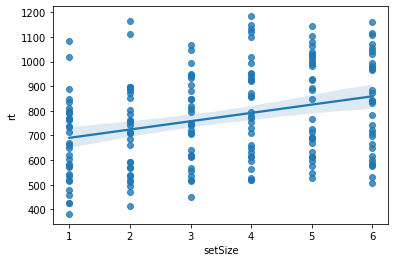

In [351]:
ax = sns.regplot(x = 'setSize', y = 'rt', data = data)

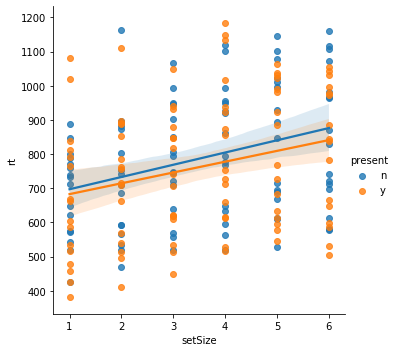

In [352]:
ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present"
)

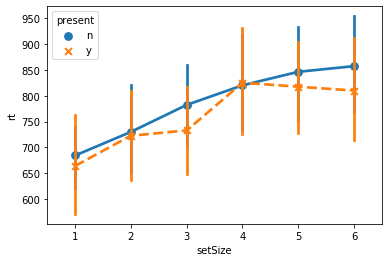

In [353]:
ax = sns.pointplot(x="setSize", y="rt", hue="present", data=data, markers=["o","x"], linestyles=["-","--"])